МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Арсений Ашуха, ars.ashuha@gmail.com

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Hastie, The Elements of Statistical Learning, https://goo.gl/k3wfEU, 10 Boosting and Additive Trees 337
- Соколов, Семинары по композиционным методам, https://goo.gl/sn8RyJ, http://goo.gl/ajNTQy

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall <номер_группы> <фамилия>``, к примеру -- ``ML2016_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipynb``, к примеру -- ``ivanov_401_task1.ipynb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Чем отличается AdaBoost от XGBoost? Перечислите принципиальные отличия. 

Adaboost - композиционный алгоритм, который использует веса, чтобы указать на ошибки предыдущуго алгоритма в композиции, чтобы каждый следующий алгоритм больше фокусировался именно на этих объектах, причем у базового алгоритма будет больше вес в композиции, если он меньше ошибается.
XGBoost во-первых является конкретной реализацией градиентного бустинга, а не generic алгоритмом. Во-вторых в градиентном бустинге каждый следующий алгоритм предсказывает градиент ошибки по ответам. Еще функция потерь может быть любая, а в Adaboost используется экспоненциальная.

**Вопрос 2**: Почему говорят, что AdaBoost неустойчив к выбросам?

AdaBoost использует экспоненциальную функцию потерь, которая сильно увеличивает веса объектов, на которых ошибаются базовые алгоритмы, а такие объекты могут оказываться шумом. Получается что итоговый композиционный алгоритм начинает подстраиваться под шумовые объекты. 

**Вопрос 3**:  В каком пространстве градиентный бустинг совершает градиентный спуск? Какова размерность этого пространства?

Градиентный бустинг совершает градиентный спуск в пространстве ответов. Размерность этого пространства это размерность вектора ответов, т.е количество элементов в выборке.

**Вопрос 4**: В чем заключается сокращение шага в градиентном бустинге? Как число итераций, необходимое для сходимости, зависит от размера шага η?

Уменьшаем коэффициенты перед градиентами при увеличении номера итерации. Чем больше шаг, тем меньше нужно итераций для сходимости и наоборот, если шаг очень маленький, то сходиться алгоритм будет медленнее.

**Вопрос 5**: Что такое стохастический градиентный бустинг?

В стохастическом градиентном бустинге на каждом шаге мы считаем градиенты по ответам только на случайно выбранной части выборки. По сути вместо обычного градиентного спуска мы выполняем стохастический градиентный спуск.

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center">Boosting</h1> 

1) Задача 1 
![](./img/task11.png)
![](./img/task12.png)

Отметим точки $x_1,...., x_l$ на прямой (переобозначим их индексы и индексы ответов так, чтобы $x_i < x_{i+1}$  для удобства) и выберем точки $z_{1,1},\ z_{1,2},\ ...\ z_{i, 1},\ z_{i, 2}....,\ z_{l + 1, 1}, z_{l + 1, 1}\ $ так, чтобы $ z_{i-1, 2} < z_{i, 1} < x_{i} < z_{i, 2} < z_{i+1, 1}\ \forall\ i\ \in\ \{1 ... l\}$. 
Пусть решающие пни выдают следующие индикаторы: $I(x < z_{i, 1} )$ и $I(x < z_{i, 2})$ и для них коэффициентами будут $-y_i$ и $ y_i$ соответственно $\forall\ i\ $. Тогда композиция таких пней будет выдавать функцию $f(x) = \sum\limits_{i\in\{1 ... l\}} y_i \cdot I(z_{i, 1} < x < z_{i, 2})$, которая всегда на объекте $x_i$ будет выдавать $y_i$. Получается мы нашли композицию 2l + 2 пней, которая не дает ошибок на обучающей выборке, что и требовалось.

2) Найдите градиент логистичиской функции потерь для фиксированного объекта

$L(z, y) = ln(1 + exp(-yz))$

$L_{z} = \frac{1}{1 + exp(-yz)} \cdot (-y)\cdot exp(-yz) = \frac{-y}{1 + exp(yz)}$

<h1 align="center">Binary Boosting Implementation</h1> 

Нужно реализовать двухклассовый бустинг с логистической функцией потерь. 

Длину шага -- или используйте $1.0*lr$ или подбирайте одномерной оптимизацией;

In [1]:
%pylab inline

import warnings
import numpy as np
import pandas as pd
from copy import deepcopy
from utils import plot_surface
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.base import ClassifierMixin, BaseEstimator
from sklearn.ensemble import GradientBoostingClassifier
from scipy.optimize import minimize

warnings.simplefilter("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
class BinaryBoostingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators, lr=0.1, optimize_step=False):
        self.lr = lr   
        self.n_estimators = n_estimators
        self.optimize_step = optimize_step
    
    def loss_grad(self, original_y, pred_y):
        return -original_y / (1 + np.exp(original_y*pred_y))
    
    def logistic_loss(self, original_y, pred_y):
        return np.sum(np.log(1 + np.exp(original_y*pred_y))) / len(original_y) 
        
    def fit(self, X, original_y):
        # Храните базовые алгоритмы тут
        self.estimators_ = []
        self.alphas = []
        
        for i in range(self.n_estimators):
            grad = self.loss_grad(original_y, self._predict(X))
            # Настройте базовый алгоритм на градиент, это классификация или регрессия?
            estimator = DecisionTreeRegressor(max_depth=4).fit(X, -grad)
            grad_pred = estimator.predict(X)
            if self.optimize_step:
                alpha_opt = minimize(lambda alpha: self.logistic_loss(original_y,
                                                                      self._predict(X) + alpha * grad_pred),
                                     [0]).x[0]
                self.alphas.append(alpha_opt)
            # print(alpha_opt)
            self.estimators_.append(estimator)  
        self.out_ = self.outliers(grad)

        return self

    def _predict(self, X):
        y_pred = np.zeros(X.shape[0]) 
        for idx, estimator in enumerate(self.estimators_):
            if self.optimize_step:
                y_pred += self.alphas[idx] * estimator.predict(X)
            else:
                y_pred += self.lr * estimator.predict(X)
        # y_pred = <Получите ответ композиции до применения решающего правила>
                              
        return y_pred
    
    def predict(self, X):
        y_pred = np.sign(self._predict(X))
        if self.optimize_step:
            y_pred *= -1
        return y_pred
    
    def outliers(self, grad):
        return np.argsort(grad)[-10:]

<h1 align="center">Simple test</h1> 

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=2,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2,
                           flip_y=0.05, class_sep=0.8, random_state=241)
y = 2*(y-0.5)

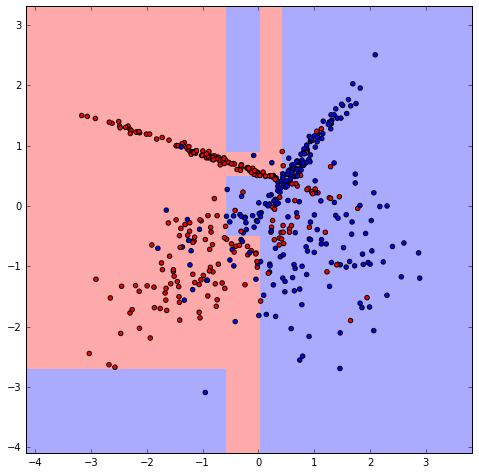

In [221]:
clf = BinaryBoostingClassifier(n_estimators=100, optimize_step=True).fit(X, y)
plot_surface(X, y, clf)

<h1 align="center">Outliers</h1> 

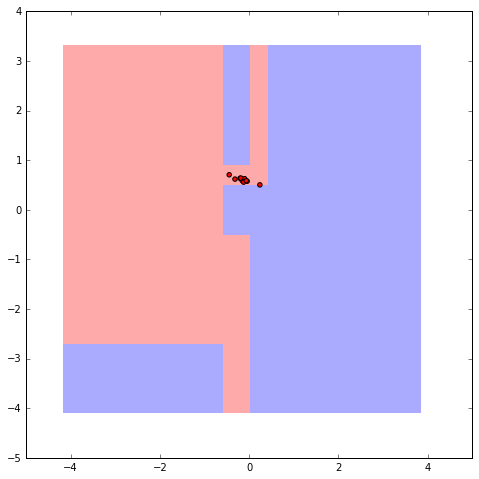

In [222]:
from matplotlib.colors import ListedColormap
indices = clf.out_
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[indices, 0], X[indices, 1], c=-y[indices], cmap=cmap_bold)

<h1 align="center">Adult test</h1> 

In [ ]:
!sh ./get_data.sh

In [460]:
adult = pd.read_csv(
    './data/adult.data', 
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"], 
    header=None, na_values="?")
adult = pd.get_dummies(adult)
adult["Target"] = adult["Target_ >50K"]

In [461]:
X, y = adult[adult.columns[:-3]].values, adult[adult.columns[-1]].values
y = 2*(y-0.5)

In [462]:
# Качество с использованием одномерной минимизации
sklearn_clf_score = cross_val_score(GradientBoostingClassifier(), X, y)
my_clf_score = cross_val_score(BinaryBoostingClassifier(10, optimize_step=True), X, y)
print("GradientBoostingClassifier score: {}".format(sklearn_clf_score))
print("BinaryBoostingClassifier score: {}".format(my_clf_score))

GradientBoostingClassifier score: [ 0.8620785   0.86493459  0.86998986]
BinaryBoostingClassifier score: [ 0.84273079  0.84383637  0.8479683 ]


In [229]:
#  Качество с использованием learning_rate=0.5
sklearn_clf_score = cross_val_score(GradientBoostingClassifier(), X, y)
my_clf_score = cross_val_score(BinaryBoostingClassifier(10, 0.5,optimize_step=False), X, y)
print("GradientBoostingClassifier score: {}".format(sklearn_clf_score))
print("BinaryBoostingClassifier score: {}".format(my_clf_score))

GradientBoostingClassifier score: [ 0.86217063  0.86493459  0.86998986]
BinaryBoostingClassifier score: [ 0.84549475  0.85231251  0.85386529]


In [463]:
#  Качество с использованием learning_rate=0.5 и 100 деревьями
sklearn_clf_score = cross_val_score(GradientBoostingClassifier(), X, y)
my_clf_score = cross_val_score(BinaryBoostingClassifier(100, 0.5,optimize_step=False), X, y)
print("GradientBoostingClassifier score: {}".format(sklearn_clf_score))
print("BinaryBoostingClassifier score: {}".format(my_clf_score))

GradientBoostingClassifier score: [ 0.86217063  0.86493459  0.86989772]
BinaryBoostingClassifier score: [ 0.86244702  0.86723788  0.87275408]


<h1 align="center">Text classification</h1> 

- Найдите двухклассовый текстовый датасет (в качестве примера sentiment analysis) или возьмите многоклассовый и классифицируйте один класс против остальных
- Попробуйте бустинг на решающих деревьях, в качестве фичей используйте tf-idf и svd/random_projection/hashing_trick, что работает лучше? Сравните качество и время работы.

Возьмем датасет с https://inclass.kaggle.com/c/si650winter11/data. 

In [3]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import TruncatedSVD

In [241]:
X = np.array([])
y = np.array([])
with open("train.txt", 'r') as train:
    for line in train:
        tokens = re.split(r'\s+', line)
        X = np.append(X, " ".join(tokens[1:]))
        y = np.append(y, int(tokens[0]))

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Результат с фичами tfidf без уменьшения размерности.

In [243]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [244]:
clf = BinaryBoostingClassifier(100, optimize_step=True)
clf = clf.fit(X_train_tfidf, y_train)
y_pred_tfidf = clf.predict(X_test_tfidf)
tfidf_score = accuracy_score(y_test, y_pred_tfidf)

In [245]:
print(tfidf_score)

0.573377234243


Результат с фичами hashing vectorizer без уменьшения размерности.

In [246]:
vectorizer = HashingVectorizer()
X_train_hash = vectorizer.fit_transform(X_train)
X_test_hash = vectorizer.transform(X_test)

In [248]:
clf = BinaryBoostingClassifier(100, optimize_step=True)
clf = clf.fit(X_train_hash, y_train)
y_pred_hash = clf.predict(X_test_hash)
hash_score = accuracy_score(y_test, y_pred_hash)

In [249]:
print(hash_score)

0.573377234243


Результат с фичами tfidf с уменьшением размерности с помощью случайных проекций.

In [313]:
transformer = GaussianRandomProjection(13)
X_train_tfidf_reduced = transformer.fit_transform(X_train_tfidf)
X_test_tfidf_reduced = transformer.transform(X_test_tfidf)

In [314]:
clf = BinaryBoostingClassifier(100, optimize_step=True)
clf = clf.fit(X_train_tfidf_reduced, y_train)
y_pred_tfidf_reduced = clf.predict(X_test_tfidf_reduced)
tfidf_reduced_score = accuracy_score(y_test, y_pred_tfidf_reduced)

In [315]:
print(tfidf_reduced_score)

0.590310442145


Результат с фичами tfidf с уменьшением размерности с помощью SVD.

In [431]:
transformer = TruncatedSVD(13)
X_train_tfidf_reduced2 = transformer.fit_transform(X_train_tfidf)
X_test_tfidf_reduced2 = transformer.transform(X_test_tfidf)

In [432]:
clf = BinaryBoostingClassifier(10, optimize_step=True)
clf = clf.fit(X_train_tfidf_reduced2, y_train)
y_pred_tfidf_reduced2 = clf.predict(X_test_tfidf_reduced2)
tfidf_reduced_score2 = accuracy_score(y_test, y_pred_tfidf_reduced2)

In [433]:
print(tfidf_reduced_score2)

0.584195672625


Результат с фичами hashing vectorizer с уменьшением размерности с помощью случайных проекций.

In [448]:
transformer = GaussianRandomProjection(13)
X_train_hash_reduced = transformer.fit_transform(X_train_hash)
X_test_hash_reduced = transformer.transform(X_test_hash)

In [449]:
clf = BinaryBoostingClassifier(100, optimize_step=True)
clf = clf.fit(X_train_hash_reduced, y_train)
y_pred_hash_reduced = clf.predict(X_test_hash_reduced)
hash_reduced_score = accuracy_score(y_test, y_pred_hash_reduced)

In [450]:
print(hash_reduced_score)

0.595014111007


Результат с фичами hashing vectorizer с уменьшением размерности с помощью SVD.

In [454]:
transformer = TruncatedSVD(13)
X_train_hash_reduced2 = transformer.fit_transform(X_train_hash)
X_test_hash_reduced2 = transformer.transform(X_test_hash)

In [455]:
clf = BinaryBoostingClassifier(10, optimize_step=True)
clf = clf.fit(X_train_hash_reduced2, y_train)
y_pred_hash_reduced2 = clf.predict(X_test_hash_reduced2)
hash_reduced_score2 = accuracy_score(y_test, y_pred_hash_reduced2)

In [456]:
print(hash_reduced_score2)

0.640639698965


Фичи hashing vectorizer не отличаются от фичей tfidf по accuracy, но с ними медленнее работать.
C уменьшением размерности качество возрастает, чуть сильнее оно возрастает у SVD.

<h1 align="center">Random Forest vs Boosting</h1> 

Подберите 2+ датасета как минимум большой и маленький (не использованных в этом дз) и проведите сравнение random forest и градиентного бустинга, используйте реализации алгоритмов из библиотеки sklearn.

- Опишите результаты, почему тот или другой алгоритм на конкретном датасете работает лучше/хуже?
- Как вы настраивали гиперпараметры алгоритмов?
- Как вы проверяли качество алгоритмов?

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

### Датасет Amazon Fine Food Reviews

In [12]:
data = pd.read_csv("Reviews.csv")
data = data.dropna()
X = data['Summary'].values
y = data['Score'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

Результаты RandomForest:

In [19]:
forest = RandomForestClassifier()
forest = forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print(accuracy_score(y_pred_forest, y_test))

0.775392320143


Результаты GradientBoosting:

In [20]:
boosting = GradientBoostingClassifier()
boosting = boosting.fit(X_train, y_train)
y_pred_boost = boosting.predict(X_test.toarray())
print(accuracy_score(y_pred_boost, y_test))

0.689844244798


### Датасет Ирисы Фишера

In [21]:
data = load_iris()
X = data['data']
y = data['target']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Результаты RandomForest:

In [23]:
forest = RandomForestClassifier()
forest = forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print(accuracy_score(y_pred_forest, y_test))

0.933333333333


Результаты GradientBoosting:

In [25]:
boosting = GradientBoostingClassifier()
boosting = boosting.fit(X_train, y_train)
y_pred_boost = boosting.predict(X_test)
print(accuracy_score(y_pred_boost, y_test))

0.933333333333


На маленьком датасете получились одинаковые результаты, т.к признаков было мало. На большом датасете с большим количеством фичей результат лучше у RandomForest. При работе с датасетом Amazon пришлось уменьшить количество фичей, ибо не влезало в память.

<h1 align="center">Bonus part</h1> 

Это удвоит баллы за дз.

- Реализуйте мультиклассовый бустинг -- проверьте на CIFAR10 + SVD
- Попробуйте различные функции потерь, придумайте несколько своих, удалось ли обойти логистичискую и экспоненциальную?